In [36]:
# This Project is a continuation of a previous project that I have done
# This is a project about What Makes a good F1 Race?

# Let's start by importing what we need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
dataset_folder_path = 'Data/'

circuits = pd.read_csv(dataset_folder_path + "circuits.csv")
drivers = pd.read_csv(dataset_folder_path + "drivers.csv")
laptimes = pd.read_csv(dataset_folder_path + "lap_times.csv")
races = pd.read_csv(dataset_folder_path + "races.csv")
results = pd.read_csv(dataset_folder_path + "results.csv")
status = pd.read_csv(dataset_folder_path + "status.csv")
top_100_df = pd.read_csv(dataset_folder_path + "top_100_races_f1.csv")



In [38]:
results["position"] = results["position"].replace(r'\N', 0)
results["position"] = results["position"].astype(float)
results["position"]

results["positionOrder"] = results["positionOrder"].astype(float)
results["positionOrder"]

results["rank"] = results["rank"].replace(r'\N', 0)
results["rank"] = results["rank"].astype(float)
results["rank"]

0         2.0
1         3.0
2         5.0
3         7.0
4         1.0
         ... 
26275    12.0
26276    13.0
26277    17.0
26278    18.0
26279    19.0
Name: rank, Length: 26280, dtype: float64

In [39]:
circuits

,circuitId,circuitRef,name,location,country,lat,lng,alt
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130
...,...,...,...,...,...,...,...,...
72,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108
73,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255
74,77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.63190,39.10440,15
75,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,12


In [40]:
type_top_100_df = {
    "Ranking": str,
    "raceId": int,
    "circuitId": int,
    "name": str,
    "rating": float,
    "year": int
}
top_100_df = top_100_df.astype(type_top_100_df, errors="ignore")
top_100_df.dropna(how="any", inplace=True)
top_100_df

,Ranking,raceId,circuitId,name,rating,year
0,1,879,18,Brazilian Grand Prix,9.45,2012
1,2,1020,10,German Grand Prix,9.44,2019
2,3,843,17,Chinese Grand Prix,9.24,2011
3,4,906,7,Canadian Grand Prix,9.19,2014
4,5,910,11,Hungarian Grand Prix,9.14,2014
...,...,...,...,...,...,...
95,96,855,22,Japanese Grand Prix,7.57,2011
96,97,975,7,Canadian Grand Prix,7.55,2017
97,98,353,35,South Korean Grand Prix,7.54,2010
98,99,970,17,Chinese Grand Prix,7.53,2017


In [41]:
top_100_circuits = pd.merge(top_100_df, circuits, on="circuitId", how="left")
top_100_circuits = top_100_circuits.drop(['lat', 'lng', 'alt', 'name_x'], axis=1)
top_100_circuits = top_100_circuits.rename(columns={'name_y': 'name'})
top_100_circuits

,Ranking,raceId,circuitId,rating,year,circuitRef,name,location,country
0,1,879,18,9.45,2012,interlagos,Autódromo José Carlos Pace,São Paulo,Brazil
1,2,1020,10,9.44,2019,hockenheimring,Hockenheimring,Hockenheim,Germany
2,3,843,17,9.24,2011,shanghai,Shanghai International Circuit,Shanghai,China
3,4,906,7,9.19,2014,villeneuve,Circuit Gilles Villeneuve,Montreal,Canada
4,5,910,11,9.14,2014,hungaroring,Hungaroring,Budapest,Hungary
...,...,...,...,...,...,...,...,...,...
95,96,855,22,7.57,2011,suzuka,Suzuka Circuit,Suzuka,Japan
96,97,975,7,7.55,2017,villeneuve,Circuit Gilles Villeneuve,Montreal,Canada
97,98,353,35,7.54,2010,yeongam,Korean International Circuit,Yeongam County,Korea
98,99,970,17,7.53,2017,shanghai,Shanghai International Circuit,Shanghai,China


In [42]:
# From Previous Project; Show the count of circuits with it's average race rating

race_ratings_2022_2021_2019 = pd.read_csv(dataset_folder_path + "All_Races_Ratings.csv")
race_ratings_2022_2021_2019

,raceId,circuitId,name,rating,year
0,1094,32,Mexican Grand Prix,3.90,2022
1,1081,73,Azerbaijan Grand Prix,5.03,2022
2,1089,14,Italian Grand Prix,5.28,2022
3,1092,22,Japanese Grand Prix,5.44,2022
4,1078,79,Miami Grand Prix,5.63,2022
...,...,...,...,...,...
59,1011,3,Bahrain Grand Prix,8.50,2019
60,1019,9,British Grand Prix,8.60,2019
61,1029,18,Brazilian Grand Prix,8.80,2019
62,1018,70,Austrian Grand Prix,8.90,2019


In [43]:
#Race Ratings Data Frame
#Concat top 100 and race ratings from 2022, 2021, and 2019
#merge top 100 
race_ratings = pd.concat([top_100_df, race_ratings_2022_2021_2019])
race_ratings = race_ratings.drop_duplicates(subset='raceId')
race_ratings = race_ratings.drop(['Ranking'], axis=1)
race_ratings = pd.merge(race_ratings, circuits, on="circuitId", how="left")
race_ratings = race_ratings.drop(['lat', 'lng', 'alt'], axis=1)
race_ratings = race_ratings.rename(
    columns={
        'name_x': 'Grand Prix',
        'name_y': 'Circuit Name',
        'rating': 'Race Rating',
        'year': 'Year',
        'location': 'Location',
        'country': 'Country'
            })
race_ratings.sort_values(by="Race Rating", ascending=False, inplace=True)
race_ratings



,raceId,circuitId,Grand Prix,Race Rating,Year,circuitRef,Circuit Name,Location,Country
0,879,18,Brazilian Grand Prix,9.45,2012,interlagos,Autódromo José Carlos Pace,São Paulo,Brazil
1,1020,10,German Grand Prix,9.44,2019,hockenheimring,Hockenheimring,Hockenheim,Germany
2,843,17,Chinese Grand Prix,9.24,2011,shanghai,Shanghai International Circuit,Shanghai,China
3,906,7,Canadian Grand Prix,9.19,2014,villeneuve,Circuit Gilles Villeneuve,Montreal,Canada
4,910,11,Hungarian Grand Prix,9.14,2014,hungaroring,Hungaroring,Budapest,Hungary
...,...,...,...,...,...,...,...,...,...
129,1016,7,Canadian Grand Prix,4.40,2019,villeneuve,Circuit Gilles Villeneuve,Montreal,Canada
116,1056,6,Monaco Grand Prix,4.00,2021,monaco,Circuit de Monaco,Monte-Carlo,Monaco
100,1094,32,Mexican Grand Prix,3.90,2022,rodriguez,Autódromo Hermanos Rodríguez,Mexico City,Mexico
128,1017,34,French Grand Prix,3.50,2019,ricard,Circuit Paul Ricard,Le Castellet,France


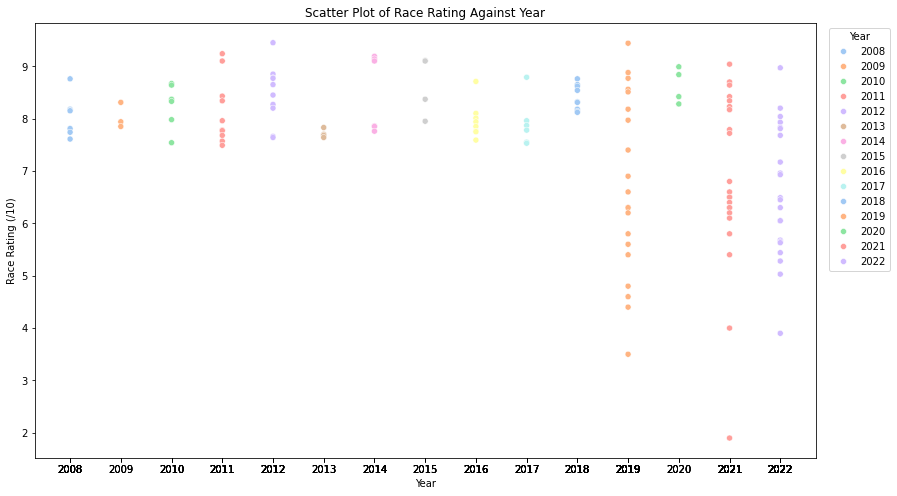

In [44]:
# Now lets look at the whole dataset

#Scatter Plot

plt.figure(figsize=(14,8))
plt.title('Scatter Plot of Race Rating Against Year')
sns.scatterplot(x='Year', y='Race Rating', data=race_ratings, hue='Year', legend='full', palette='pastel')
plt.xlabel("Year")
plt.ylabel("Race Rating (/10)")
plt.xticks(race_ratings['Year'])
plt.legend(title='Year', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

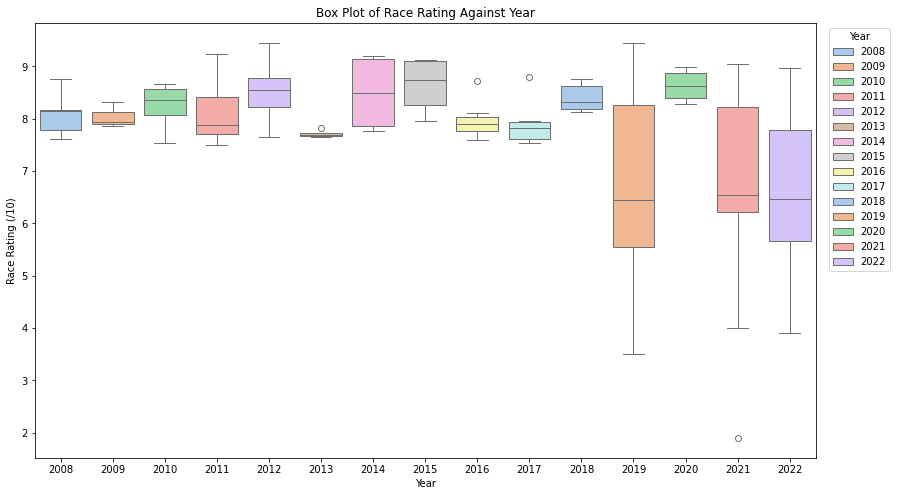

In [45]:
# Histogram

plt.figure(figsize=(14,8))
plt.title('Box Plot of Race Rating Against Year')
sns.boxplot(x='Year', y='Race Rating', data=race_ratings, hue='Year', legend='full', palette='pastel')
plt.xlabel("Year")
plt.ylabel("Race Rating (/10)")
plt.legend(title='Year', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()


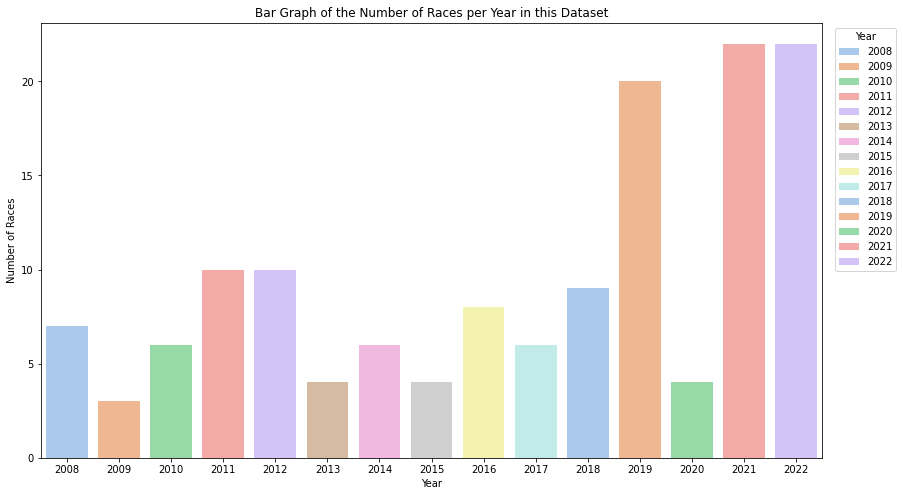

In [46]:
# Bar Graph 

plt.figure(figsize=(14,8))
plt.title('Bar Graph of the Number of Races per Year in this Dataset')
sns.countplot(x='Year', data=race_ratings, hue='Year', legend='full', palette='pastel')
plt.xlabel("Year")
plt.ylabel("Number of Races")
plt.legend(title='Year', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()


In [47]:
# Remove Spa 2021 as it is a large outlier
# Going to remove row 141
# Rating was affected because of race not occuring


race_ratings_no_spa_2021 = race_ratings[:-1] # drop last row
race_ratings_no_spa_2021

,raceId,circuitId,Grand Prix,Race Rating,Year,circuitRef,Circuit Name,Location,Country
0,879,18,Brazilian Grand Prix,9.45,2012,interlagos,Autódromo José Carlos Pace,São Paulo,Brazil
1,1020,10,German Grand Prix,9.44,2019,hockenheimring,Hockenheimring,Hockenheim,Germany
2,843,17,Chinese Grand Prix,9.24,2011,shanghai,Shanghai International Circuit,Shanghai,China
3,906,7,Canadian Grand Prix,9.19,2014,villeneuve,Circuit Gilles Villeneuve,Montreal,Canada
4,910,11,Hungarian Grand Prix,9.14,2014,hungaroring,Hungaroring,Budapest,Hungary
...,...,...,...,...,...,...,...,...,...
130,1014,12,Spanish Grand Prix,4.60,2019,valencia,Valencia Street Circuit,Valencia,Spain
129,1016,7,Canadian Grand Prix,4.40,2019,villeneuve,Circuit Gilles Villeneuve,Montreal,Canada
116,1056,6,Monaco Grand Prix,4.00,2021,monaco,Circuit de Monaco,Monte-Carlo,Monaco
100,1094,32,Mexican Grand Prix,3.90,2022,rodriguez,Autódromo Hermanos Rodríguez,Mexico City,Mexico


In [48]:
# Hypothesis 1: Does circuit matter in relation to race rating?

race_ratings_no_spa_2021['NameOfCircuit'] = race_ratings_no_spa_2021.loc[:, 'Circuit Name']
circuit_rating = race_ratings_no_spa_2021.groupby(by=["NameOfCircuit", "Location", "Country"], as_index=False).aggregate(
    {
        "Circuit Name": 'count',
        "Race Rating": 'mean' 
    }
).rename(({"Circuit Name": "Circuit Count"}), axis = 1)

#circuit_rating.sort_values(by="Circuit Count", ascending=False, inplace=True)
#circuit_rating = circuit_rating[circuit_rating["Circuit Count"] > 1]
circuit_rating.sort_values(by="Race Rating", ascending=False, inplace=True)
circuit_rating

C:\Users\jaceh\AppData\Local\Temp\ipykernel_9596\2234014174.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_ratings_no_spa_2021['NameOfCircuit'] = race_ratings_no_spa_2021.loc[:, 'Circuit Name']


,NameOfCircuit,Location,Country,Circuit Count,Race Rating
5,Autódromo José Carlos Pace,São Paulo,Brazil,8,8.493750
15,Hockenheimring,Hockenheim,Germany,3,8.480000
6,Bahrain International Circuit,Sakhir,Bahrain,8,8.378750
16,Hungaroring,Budapest,Hungary,7,8.374286
14,Circuit of the Americas,Austin,USA,6,8.361667
11,Circuit de Barcelona-Catalunya,Montmeló,Spain,3,8.283333
25,Sepang International Circuit,Kuala Lumpur,Malaysia,4,8.152500
27,Silverstone Circuit,Silverstone,UK,8,8.050000
23,Nürburgring,Nürburg,Germany,2,8.035000
26,Shanghai International Circuit,Shanghai,China,7,7.860000


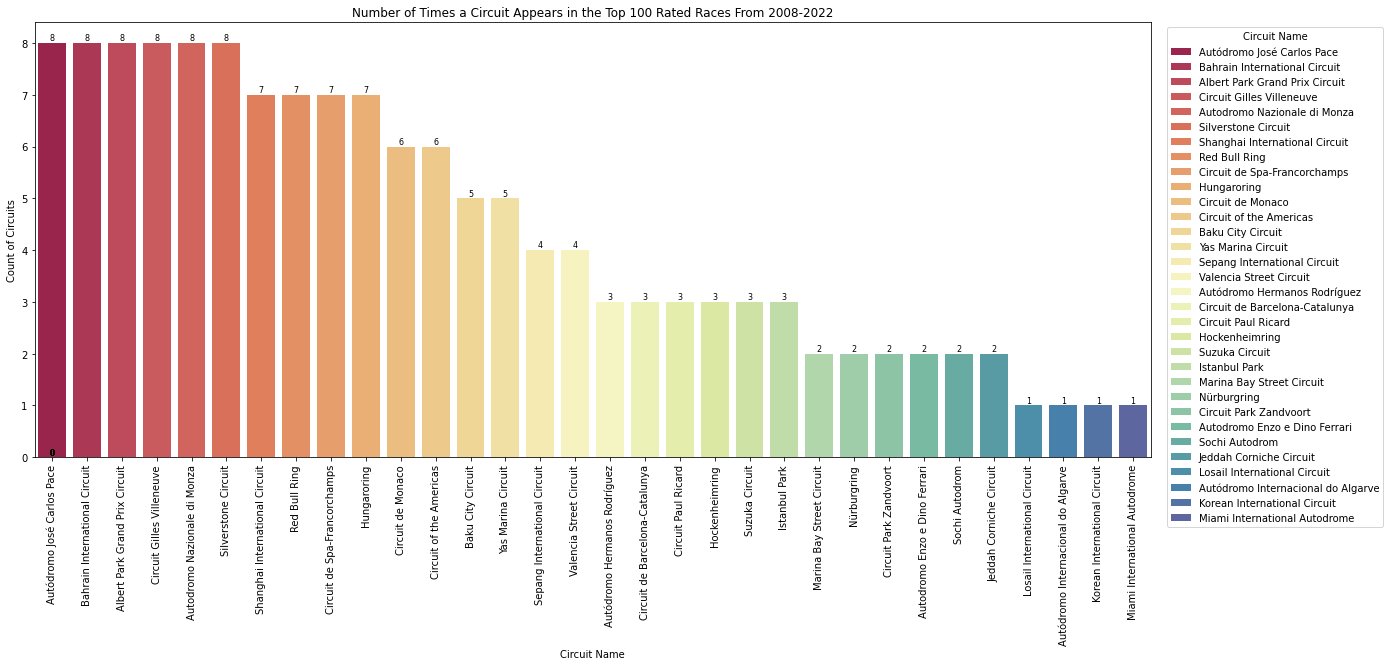

In [49]:
circuit_rating.sort_values(by="Circuit Count", ascending=False, inplace=True)
circuit_rating_sorted = circuit_rating

plt.figure(figsize=(20,8))
bars = sns.barplot(x='NameOfCircuit', y='Circuit Count', data=circuit_rating_sorted, hue='NameOfCircuit', legend='full', palette='Spectral')
plt.title("Number of Times a Circuit Appears in the Top 100 Rated Races From 2008-2022")
plt.xlabel("Circuit Name")
plt.ylabel("Count of Circuits")
plt.xticks(rotation=90)

for p in bars.patches:
    bars.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8, color='black')

plt.legend(title='Circuit Name', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

In [50]:
# Average Race Rating for Each Circuit
# Removed Circuits with a Circuit Count of 1

circuit_rating_remove_1 = circuit_rating[circuit_rating["Circuit Count"] > 1]
circuit_rating_remove_1.sort_values(by="Race Rating", ascending=False, inplace=True)
circuit_rating_remove_1

C:\Users\jaceh\AppData\Local\Temp\ipykernel_9596\109197966.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  circuit_rating_remove_1.sort_values(by="Race Rating", ascending=False, inplace=True)


,NameOfCircuit,Location,Country,Circuit Count,Race Rating
5,Autódromo José Carlos Pace,São Paulo,Brazil,8,8.493750
15,Hockenheimring,Hockenheim,Germany,3,8.480000
6,Bahrain International Circuit,Sakhir,Bahrain,8,8.378750
16,Hungaroring,Budapest,Hungary,7,8.374286
14,Circuit of the Americas,Austin,USA,6,8.361667
11,Circuit de Barcelona-Catalunya,Montmeló,Spain,3,8.283333
25,Sepang International Circuit,Kuala Lumpur,Malaysia,4,8.152500
27,Silverstone Circuit,Silverstone,UK,8,8.050000
23,Nürburgring,Nürburg,Germany,2,8.035000
26,Shanghai International Circuit,Shanghai,China,7,7.860000


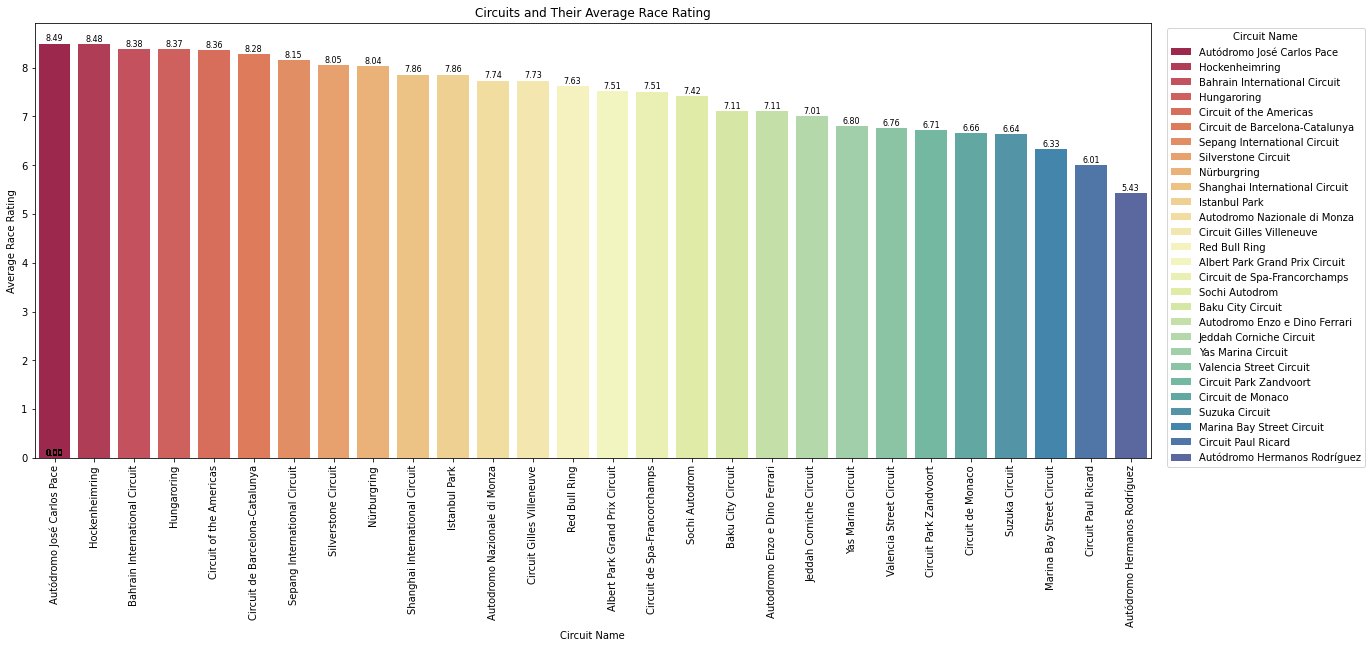

In [51]:
# Plot Bar Graph Circuits and their Average Race Rating
plt.figure(figsize=(20,8))
bars = sns.barplot(x="NameOfCircuit", y="Race Rating", data=circuit_rating_remove_1, hue='NameOfCircuit', legend='full', palette='Spectral')
plt.title("Circuits and Their Average Race Rating")
plt.xlabel("Circuit Name")
plt.ylabel("Average Race Rating")
plt.xticks(rotation=90)

for p in bars.patches:
    bars.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8, color='black')

plt.legend(title='Circuit Name', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

In [52]:
# Hypothesis 2: DNFs

# Race Statistics 

race_ratings_drop = race_ratings_no_spa_2021.drop(['Country', 'Location', 'circuitRef', 'circuitId', 'Grand Prix'], axis=1)
races_drop = races.drop(['fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time', 'time', 'date'], axis=1)
race_stats_ratings = pd.merge(left=race_ratings_drop, right=races_drop, on='raceId', how='left')
race_stats_ratings = race_stats_ratings.dropna(axis=0)


race_stats_ratings

,raceId,Race Rating,Year,Circuit Name,NameOfCircuit,year,round,circuitId,name
0,879,9.45,2012,Autódromo José Carlos Pace,Autódromo José Carlos Pace,2012,20,18,Brazilian Grand Prix
1,1020,9.44,2019,Hockenheimring,Hockenheimring,2019,11,10,German Grand Prix
2,843,9.24,2011,Shanghai International Circuit,Shanghai International Circuit,2011,3,17,Chinese Grand Prix
3,906,9.19,2014,Circuit Gilles Villeneuve,Circuit Gilles Villeneuve,2014,7,7,Canadian Grand Prix
4,910,9.14,2014,Hungaroring,Hungaroring,2014,11,11,Hungarian Grand Prix
...,...,...,...,...,...,...,...,...,...
135,1014,4.60,2019,Valencia Street Circuit,Valencia Street Circuit,2019,5,4,Spanish Grand Prix
136,1016,4.40,2019,Circuit Gilles Villeneuve,Circuit Gilles Villeneuve,2019,7,7,Canadian Grand Prix
137,1056,4.00,2021,Circuit de Monaco,Circuit de Monaco,2021,5,6,Monaco Grand Prix
138,1094,3.90,2022,Autódromo Hermanos Rodríguez,Autódromo Hermanos Rodríguez,2022,20,32,Mexico City Grand Prix


In [53]:
# Count number of DNFs function

def dnf_count(results_df, race_id_in_results):
    #counter for DNFs
    dnf_counter = 0
    #Array for each statusId that a driver finsihed the race in status.csv
    status_finished_race = [1, 11, 12, 13, 14, 15, 16, 17, 18, 19, 45, 50, 128, 53, 55, 58, 88, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 127, 133, 134]

    for i in results_df[results_df['raceId'] == race_id_in_results]['statusId']:
        if i not in status_finished_race:
            dnf_counter = dnf_counter + 1
        else:
            pass

    return dnf_counter


In [54]:
race_stats_ratings['DNF'] = race_stats_ratings.raceId.apply(lambda x: dnf_count(results, x))
race_stats_ratings.sort_values(by="DNF", ascending=False, inplace=True)
race_stats_ratings

race_stats_ratings.sort_values(by="Race Rating", ascending=False, inplace=True)
race_stats_ratings

,raceId,Race Rating,Year,Circuit Name,NameOfCircuit,year,round,circuitId,name,DNF
0,879,9.45,2012,Autódromo José Carlos Pace,Autódromo José Carlos Pace,2012,20,18,Brazilian Grand Prix,6
1,1020,9.44,2019,Hockenheimring,Hockenheimring,2019,11,10,German Grand Prix,7
2,843,9.24,2011,Shanghai International Circuit,Shanghai International Circuit,2011,3,17,Chinese Grand Prix,1
3,906,9.19,2014,Circuit Gilles Villeneuve,Circuit Gilles Villeneuve,2014,7,7,Canadian Grand Prix,11
4,910,9.14,2014,Hungaroring,Hungaroring,2014,11,11,Hungarian Grand Prix,6
...,...,...,...,...,...,...,...,...,...,...
135,1014,4.60,2019,Valencia Street Circuit,Valencia Street Circuit,2019,5,4,Spanish Grand Prix,2
136,1016,4.40,2019,Circuit Gilles Villeneuve,Circuit Gilles Villeneuve,2019,7,7,Canadian Grand Prix,2
137,1056,4.00,2021,Circuit de Monaco,Circuit de Monaco,2021,5,6,Monaco Grand Prix,2
138,1094,3.90,2022,Autódromo Hermanos Rodríguez,Autódromo Hermanos Rodríguez,2022,20,32,Mexico City Grand Prix,2


In [55]:
def coef_linear_regression(x,y):
    n = np.size(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    ss_xy = np.sum(y*x) - n*y_mean*x_mean
    ss_xx = np.sum(x*x) - n*x_mean*x_mean

    gradient = ss_xy / ss_xx
    y_intercept = y_mean - gradient*x_mean

    return(y_intercept, gradient)

def correlation_coefficient(x,y):

    x_mean = np.mean(x)
    y_mean = np.mean(y)

    numerator = np.sum((x - x_mean) * (y - y_mean))
    x_denominator = np.sum((x - x_mean)**2)
    y_denominator = np.sum((y - y_mean)**2)
    denominator = np.sqrt(x_denominator * y_denominator)

    corr_coef = numerator / denominator

    return corr_coef

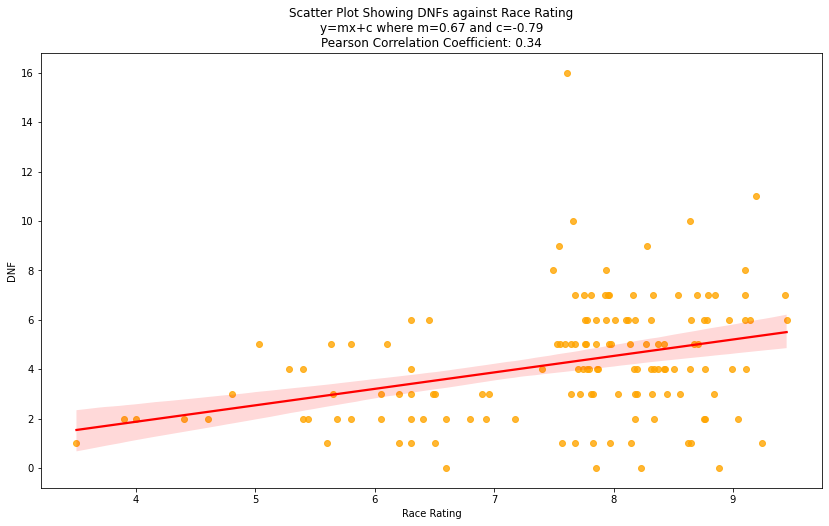

In [56]:
#Scatter plot DNFs against Race Rating
x = race_stats_ratings["Race Rating"]
y = race_stats_ratings["DNF"]
b = coef_linear_regression(x,y)

plt.figure(figsize=(14,8))
corr_coef_value_dnf = correlation_coefficient(x,y)
sns.regplot(x='Race Rating', y='DNF', data=race_stats_ratings, scatter_kws={"color": "orange"}, line_kws={"color": "red"})
plt.title("Scatter Plot Showing DNFs against Race Rating\ny=mx+c where m="
          + str(round(b[1], 2)) + " and c=" + str(round(b[0], 2)) + 
          "\nPearson Correlation Coefficient: " + str(round(corr_coef_value_dnf , 2)))
plt.show()

In [57]:
# Hypothesis 3: Overtakes on track

# Now lets count the number of overtakes and comapre that to Race Rating
# overtaking_count function

# There are a few things to be careful with in this function
# For something to count as an "overtake", a driver changes their position between two consecutive laps. This would mean an "overtake" has occured.
# Count this number then divide by 2 will give the number of overtakes as one overtake includes one driver gaining a position and the other losing a position.

def overtaking_count(laptimes, race_id):
    drivers = []
    for driver in laptimes[laptimes.raceId == race_id].driverId:
        if driver not in drivers:
            drivers.append(driver)
    
    prev_pos = 0
    overtakes = 0
    for driver in drivers:
        for lapPos in laptimes[(laptimes.raceId == race_id) & (laptimes.driverId == driver)].position:
            if lapPos != prev_pos:
                prev_pos = lapPos
                overtakes = overtakes + 1
                overtakings = overtakes/2
                
    return int(overtakings)

In [58]:
race_stats_ratings['overtakes'] = race_stats_ratings.raceId.apply(lambda x: overtaking_count(laptimes, x))
race_stats_ratings

,raceId,Race Rating,Year,Circuit Name,NameOfCircuit,year,round,circuitId,name,DNF,overtakes
0,879,9.45,2012,Autódromo José Carlos Pace,Autódromo José Carlos Pace,2012,20,18,Brazilian Grand Prix,6,228
1,1020,9.44,2019,Hockenheimring,Hockenheimring,2019,11,10,German Grand Prix,7,159
2,843,9.24,2011,Shanghai International Circuit,Shanghai International Circuit,2011,3,17,Chinese Grand Prix,1,191
3,906,9.19,2014,Circuit Gilles Villeneuve,Circuit Gilles Villeneuve,2014,7,7,Canadian Grand Prix,11,126
4,910,9.14,2014,Hungaroring,Hungaroring,2014,11,11,Hungarian Grand Prix,6,160
...,...,...,...,...,...,...,...,...,...,...,...
135,1014,4.60,2019,Valencia Street Circuit,Valencia Street Circuit,2019,5,4,Spanish Grand Prix,2,81
136,1016,4.40,2019,Circuit Gilles Villeneuve,Circuit Gilles Villeneuve,2019,7,7,Canadian Grand Prix,2,80
137,1056,4.00,2021,Circuit de Monaco,Circuit de Monaco,2021,5,6,Monaco Grand Prix,2,37
138,1094,3.90,2022,Autódromo Hermanos Rodríguez,Autódromo Hermanos Rodríguez,2022,20,32,Mexico City Grand Prix,2,92


In [59]:
#results['position'].astype(int)
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1.0,1,1.0,10.0,58,1:34:50.616,5690616,39,2.0,1:27.452,218.300,1
1,2,18,2,2,3,5,2.0,2,2.0,8.0,58,+5.478,5696094,41,3.0,1:27.739,217.586,1
2,3,18,3,3,7,7,3.0,3,3.0,6.0,58,+8.163,5698779,41,5.0,1:28.090,216.719,1
3,4,18,4,4,5,11,4.0,4,4.0,5.0,58,+17.181,5707797,58,7.0,1:28.603,215.464,1
4,5,18,5,1,23,3,5.0,5,5.0,4.0,58,+18.014,5708630,43,1.0,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26275,26281,1120,858,3,2,20,16.0,16,16.0,0.0,58,+1:27.791,5310415,43,12.0,1:28.580,214.626,1
26276,26282,1120,855,51,24,19,17.0,17,17.0,0.0,58,+1:29.422,5312046,43,13.0,1:28.746,214.224,1
26277,26283,1120,832,6,55,16,18.0,18,18.0,0.0,57,\N,\N,42,17.0,1:29.452,212.534,31
26278,26284,1120,822,51,77,18,19.0,19,19.0,0.0,57,\N,\N,42,18.0,1:29.863,211.562,11


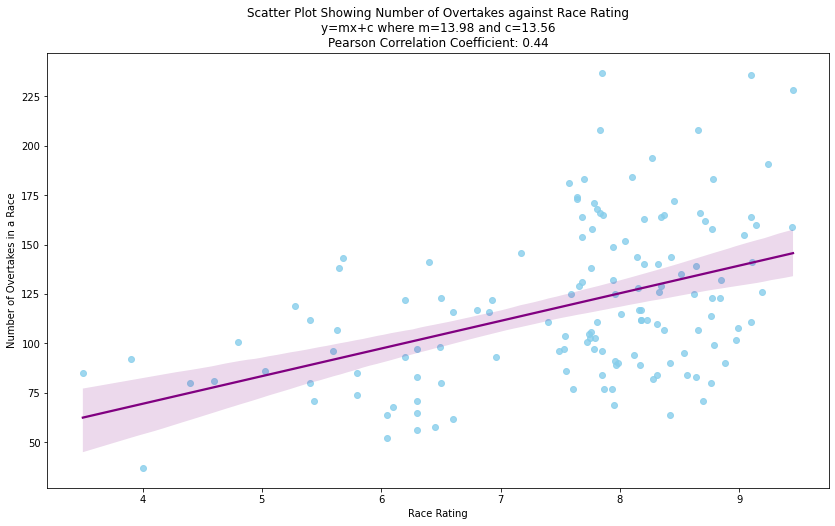

In [60]:
#Scatter plot Number of Overtakes against Race Rating

x = race_stats_ratings["Race Rating"]
y = race_stats_ratings["overtakes"]
b = coef_linear_regression(x, y)

plt.figure(figsize=(14, 8))

# Calculate correlation coefficient
corr_coef_value_overtakes = correlation_coefficient(x, y)
sns.regplot(x='Race Rating', y='overtakes', data=race_stats_ratings, scatter_kws={"color": "skyblue"}, line_kws={"color": "purple"})
plt.title("Scatter Plot Showing Number of Overtakes against Race Rating\ny=mx+c where m="
          + str(round(b[1], 2)) + " and c=" + str(round(b[0], 2)) + 
          "\nPearson Correlation Coefficient: " + str(round(corr_coef_value_overtakes , 2)))

plt.xlabel("Race Rating")
plt.ylabel("Number of Overtakes in a Race")
plt.show()

In [61]:
# Now to move on to another hypothesis
# Hypothesis 4: The Race evolution of Drivers in a race
# Top 5 Race evolution vs Top 10 Race Evolution vs Top 15 Race Evolution

def top_5_battle(raceid, results, laptimes):
    # Start with looking at top 5 per lap
    top_5 = results[(results.raceId ==  raceid) & (results.positionOrder <6)].sort_values(['positionOrder'], ascending=True)
    # Empty list
    top_5_var = []

    # Loop over each driver and calculates their vareiance of lap positons during the specified race using lap_times df
    for driver in top_5.driverId:
        top_5_variance = np.var(laptimes[(laptimes.driverId == driver) & (laptimes.raceId == raceid)].position)
        top_5_var.append(top_5_variance)

    # Calculates sum of all variances in top_5_var
    top_5_score = sum(top_5_var)


    return top_5_score


def top_10_battle(raceid, results, laptimes):
    # Start with looking at top 10 per lap
    top_10 = results[(results.raceId ==  raceid) & (results.positionOrder < 11)].sort_values(['positionOrder'], ascending=True)
    # Empty list
    top_10_var = []
    
    # Loop over each driver and calculates their vareiance of lap positons during the specified race using lap_times df
    for driver in top_10.driverId:
        top_10_variance = np.var(laptimes[(laptimes.driverId == driver) & (laptimes.raceId == raceid)].position)
        top_10_var.append(top_10_variance)

    # Calculates sum of all variances in top_10_var
    top_10_score = sum(top_10_var)


    return top_10_score


def top_15_battle(raceid, results, laptimes):
    # Start with looking at top 15 per lap
    top_15 = results[(results.raceId ==  raceid) & (results.positionOrder < 16)].sort_values(['positionOrder'], ascending=True)
    # Empty list
    top_15_var = []
    
    # Loop over each driver and calculates their vareiance of lap positons during the specified race using lap_times df
    for driver in top_15.driverId:
        top_15_variance = np.var(laptimes[(laptimes.driverId == driver) & (laptimes.raceId == raceid)].position)
        top_15_var.append(top_15_variance)

    # Calculates sum of all variances in top_15_var
    top_15_score = sum(top_15_var)


    return top_15_score

In [62]:
race_stats_ratings_top_5 = race_stats_ratings.drop(['NameOfCircuit'], axis=1)
race_stats_ratings_top_5
race_stats_ratings_top_5['Top 5 Battle'] = race_stats_ratings_top_5.raceId.apply(lambda x: top_5_battle(x, results, laptimes))
race_stats_ratings_top_5.sort_values(by="Top 5 Battle", ascending=False, inplace=True)
race_stats_ratings_top_5


,raceId,Race Rating,Year,Circuit Name,year,round,circuitId,name,DNF,overtakes,Top 5 Battle
15,976,8.79,2017,Baku City Circuit,2017,8,73,Azerbaijan Grand Prix,7,99,80.366782
1,1020,9.44,2019,Hockenheimring,2019,11,10,German Grand Prix,7,159,72.959473
75,24,7.81,2008,Circuit Gilles Villeneuve,2008,7,7,Canadian Grand Prix,7,111,69.830612
71,950,7.85,2016,Shanghai International Circuit,2016,3,17,Chinese Grand Prix,0,237,65.930166
9,1066,9.04,2021,Sochi Autodrom,2021,15,71,Russian Grand Prix,2,155,47.969384
...,...,...,...,...,...,...,...,...,...,...,...
124,1070,5.80,2021,Autódromo Hermanos Rodríguez,2021,18,32,Mexico City Grand Prix,2,74,1.328308
139,1017,3.50,2019,Circuit Paul Ricard,2019,8,34,French Grand Prix,1,85,1.040228
85,1069,7.72,2021,Circuit of the Americas,2021,17,69,United States Grand Prix,3,101,1.004145
122,1077,6.05,2022,Autodromo Enzo e Dino Ferrari,2022,4,21,Emilia Romagna Grand Prix,2,52,0.991182


In [63]:
race_stats_ratings_top_10 = race_stats_ratings.drop(['NameOfCircuit'], axis=1)
race_stats_ratings_top_10
race_stats_ratings_top_10['Top 10 Battle'] = race_stats_ratings_top_10.raceId.apply(lambda x: top_10_battle(x, results, laptimes))
race_stats_ratings_top_10.sort_values(by="Top 10 Battle", ascending=False, inplace=True)
race_stats_ratings_top_10

,raceId,Race Rating,Year,Circuit Name,year,round,circuitId,name,DNF,overtakes,Top 10 Battle
75,24,7.81,2008,Circuit Gilles Villeneuve,2008,7,7,Canadian Grand Prix,7,111,137.070000
1,1020,9.44,2019,Hockenheimring,2019,11,10,German Grand Prix,7,159,127.619873
71,950,7.85,2016,Shanghai International Circuit,2016,3,17,Chinese Grand Prix,0,237,117.165179
15,976,8.79,2017,Baku City Circuit,2017,8,73,Azerbaijan Grand Prix,7,99,116.856594
7,847,9.10,2011,Circuit Gilles Villeneuve,2011,7,7,Canadian Grand Prix,7,236,106.412245
...,...,...,...,...,...,...,...,...,...,...,...
134,1012,4.80,2019,Shanghai International Circuit,2019,3,17,Chinese Grand Prix,3,101,8.389550
122,1077,6.05,2022,Autodromo Enzo e Dino Ferrari,2022,4,21,Emilia Romagna Grand Prix,2,52,8.259206
124,1070,5.80,2021,Autódromo Hermanos Rodríguez,2021,18,32,Mexico City Grand Prix,2,74,8.204022
121,1080,6.05,2022,Circuit de Monaco,2022,7,6,Monaco Grand Prix,3,64,7.933838


In [64]:
race_stats_ratings_top_15 = race_stats_ratings.drop(['NameOfCircuit'], axis=1)
race_stats_ratings_top_15
race_stats_ratings_top_15['Top 15 Battle'] = race_stats_ratings_top_15.raceId.apply(lambda x: top_15_battle(x, results, laptimes))
race_stats_ratings_top_15.sort_values(by="Top 15 Battle", ascending=False, inplace=True)
race_stats_ratings_top_15

,raceId,Race Rating,Year,Circuit Name,year,round,circuitId,name,DNF,overtakes,Top 15 Battle
75,24,7.81,2008,Circuit Gilles Villeneuve,2008,7,7,Canadian Grand Prix,7,111,193.817507
15,976,8.79,2017,Baku City Circuit,2017,8,73,Azerbaijan Grand Prix,7,99,191.457210
32,861,8.45,2012,Sepang International Circuit,2012,2,2,Malaysian Grand Prix,3,172,180.549745
71,950,7.85,2016,Shanghai International Circuit,2016,3,17,Chinese Grand Prix,0,237,165.273719
1,1020,9.44,2019,Hockenheimring,2019,11,10,German Grand Prix,7,159,149.854727
...,...,...,...,...,...,...,...,...,...,...,...
85,1069,7.72,2021,Circuit of the Americas,2021,17,69,United States Grand Prix,3,101,20.922581
121,1080,6.05,2022,Circuit de Monaco,2022,7,6,Monaco Grand Prix,3,64,20.143901
60,343,7.98,2010,Istanbul Park,2010,7,5,Turkish Grand Prix,5,90,15.234020
122,1077,6.05,2022,Autodromo Enzo e Dino Ferrari,2022,4,21,Emilia Romagna Grand Prix,2,52,13.612224


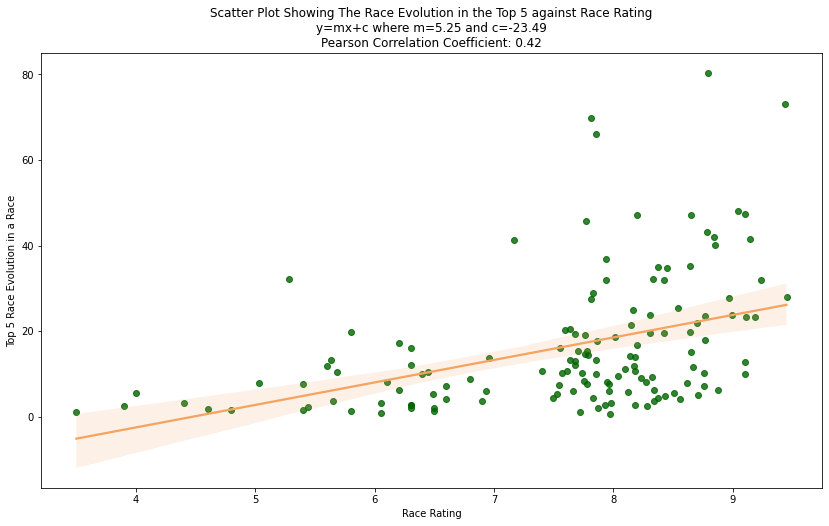

In [71]:
#Scatter plot Number of Top 5 Battle against Race Rating

x = race_stats_ratings_top_5["Race Rating"]
y = race_stats_ratings_top_5["Top 5 Battle"]
b = coef_linear_regression(x, y)

plt.figure(figsize=(14, 8))

# Calculate correlation coefficient
corr_coef_value_top_5 = correlation_coefficient(x, y)
sns.regplot(x='Race Rating', y='Top 5 Battle', data=race_stats_ratings_top_5, scatter_kws={"color": "darkgreen"}, line_kws={"color": "sandybrown"})
plt.title("Scatter Plot Showing The Race Evolution in the Top 5 against Race Rating\ny=mx+c where m="
          + str(round(b[1], 2)) + " and c=" + str(round(b[0], 2)) + 
          "\nPearson Correlation Coefficient: " + str(round(corr_coef_value_top_5 , 2)))

plt.xlabel("Race Rating")
plt.ylabel("Top 5 Race Evolution in a Race")
plt.show()

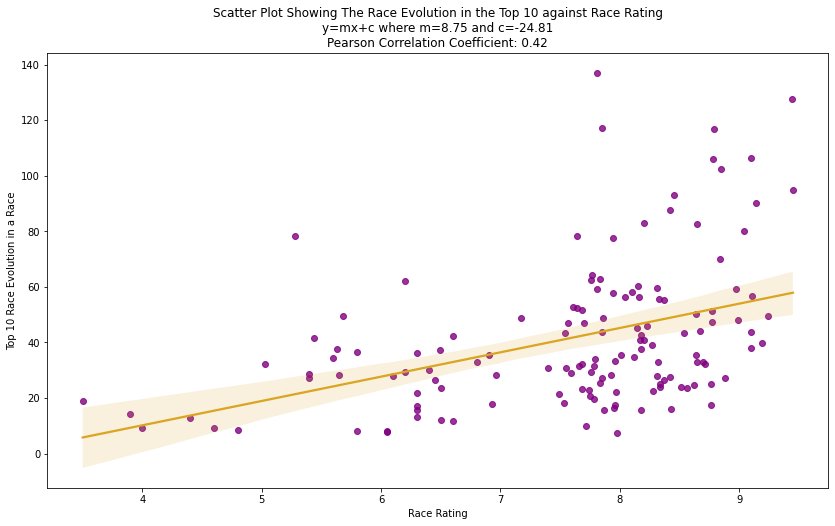

In [72]:
#Scatter plot Number of Top 10 Battle against Race Rating

x = race_stats_ratings_top_10["Race Rating"]
y = race_stats_ratings_top_10["Top 10 Battle"]
b = coef_linear_regression(x, y)

plt.figure(figsize=(14, 8))

# Calculate correlation coefficient
corr_coef_value_top_10 = correlation_coefficient(x, y)
sns.regplot(x='Race Rating', y='Top 10 Battle', data=race_stats_ratings_top_10, scatter_kws={"color": "purple"}, line_kws={"color": "goldenrod"})
plt.title("Scatter Plot Showing The Race Evolution in the Top 10 against Race Rating\ny=mx+c where m="
          + str(round(b[1], 2)) + " and c=" + str(round(b[0], 2)) + 
          "\nPearson Correlation Coefficient: " + str(round(corr_coef_value_top_10 , 2)))

plt.xlabel("Race Rating")
plt.ylabel("Top 10 Race Evolution in a Race")
plt.show()

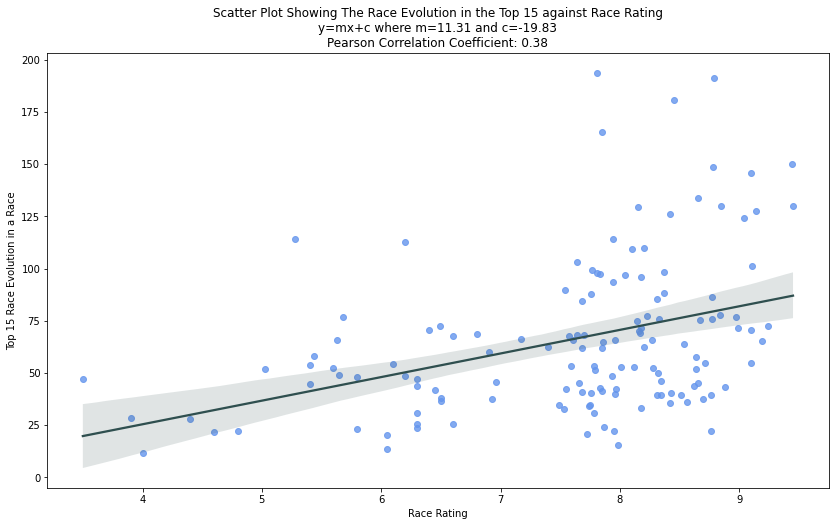

In [67]:
#Scatter plot Number of Top 15 Battle against Race Rating

x = race_stats_ratings_top_15["Race Rating"]
y = race_stats_ratings_top_15["Top 15 Battle"]
b = coef_linear_regression(x, y)

plt.figure(figsize=(14, 8))

# Calculate correlation coefficient
corr_coef_value_top_15 = correlation_coefficient(x, y)
sns.regplot(x='Race Rating', y='Top 15 Battle', data=race_stats_ratings_top_15, scatter_kws={"color": "cornflowerblue"}, line_kws={"color": "darkslategrey"})
plt.title("Scatter Plot Showing The Race Evolution in the Top 15 against Race Rating\ny=mx+c where m="
          + str(round(b[1], 2)) + " and c=" + str(round(b[0], 2)) + 
          "\nPearson Correlation Coefficient: " + str(round(corr_coef_value_top_15 , 2)))

plt.xlabel("Race Rating")
plt.ylabel("Top 15 Race Evolution in a Race")
plt.show()

In [68]:
# Hypothesis 5: The Driver's Position and Rank Against Race Rating

# The "Rank" value refers to how the fastest lap for each driver is ranked in relation to those of other drivers.
# Similiar to hypothesis 4 but in theory, a lower ranked driver finishing in a higher positon should mean there is higher rated race?

def get_rank_pos(raceid, results):
    top_5 = results[(results.raceId == raceid) & (results.position < 6)].sort_values(['position'], ascending=True)

    rank_pos_score = sum(abs(actual_position - expected_rank) for actual_position, expected_rank in zip(top_5['position'], top_5['rank']))

    return rank_pos_score


In [69]:
race_stats_ratings_rank_pos = race_stats_ratings.drop(['NameOfCircuit'], axis=1)
race_stats_ratings_rank_pos['Rank VS Position'] = race_stats_ratings_rank_pos.raceId.apply(lambda x: get_rank_pos(x, results))
race_stats_ratings_rank_pos

,raceId,Race Rating,Year,Circuit Name,year,round,circuitId,name,DNF,overtakes,Rank VS Position
0,879,9.45,2012,Autódromo José Carlos Pace,2012,20,18,Brazilian Grand Prix,6,228,31.0
1,1020,9.44,2019,Hockenheimring,2019,11,10,German Grand Prix,7,159,92.0
2,843,9.24,2011,Shanghai International Circuit,2011,3,17,Chinese Grand Prix,1,191,33.0
3,906,9.19,2014,Circuit Gilles Villeneuve,2014,7,7,Canadian Grand Prix,11,126,114.0
4,910,9.14,2014,Hungaroring,2014,11,11,Hungarian Grand Prix,6,160,127.0
...,...,...,...,...,...,...,...,...,...,...,...
135,1014,4.60,2019,Valencia Street Circuit,2019,5,4,Spanish Grand Prix,2,81,38.0
136,1016,4.40,2019,Circuit Gilles Villeneuve,2019,7,7,Canadian Grand Prix,2,80,48.0
137,1056,4.00,2021,Circuit de Monaco,2021,5,6,Monaco Grand Prix,2,37,36.0
138,1094,3.90,2022,Autódromo Hermanos Rodríguez,2022,20,32,Mexico City Grand Prix,2,92,29.0


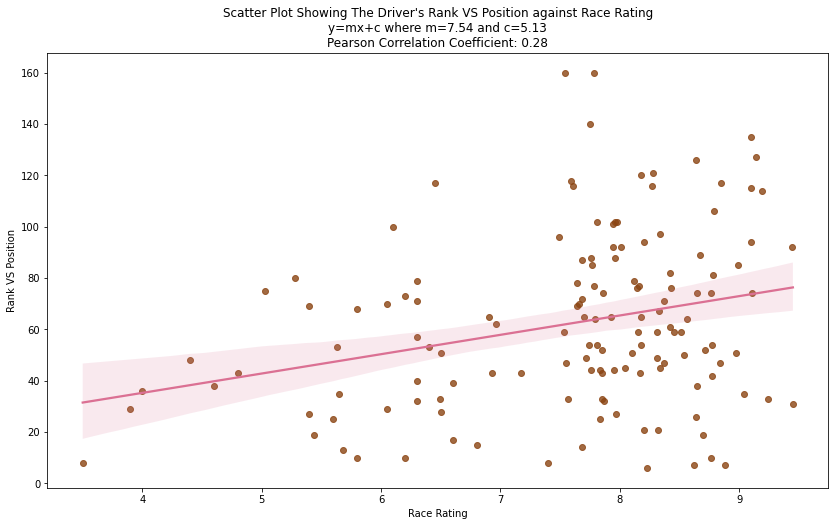

In [76]:
#Scatter plot showing the Driver's Rank and Position against Race Rating

x = race_stats_ratings_rank_pos["Race Rating"]
y = race_stats_ratings_rank_pos["Rank VS Position"]
b = coef_linear_regression(x, y)

plt.figure(figsize=(14, 8))

# Calculate correlation coefficient
corr_coef_value_rank_pos = correlation_coefficient(x, y)
sns.regplot(x='Race Rating', y='Rank VS Position', data=race_stats_ratings_rank_pos, scatter_kws={"color": "saddlebrown"}, line_kws={"color": "palevioletred"})
plt.title("Scatter Plot Showing The Driver's Rank VS Position against Race Rating\ny=mx+c where m="
          + str(round(b[1], 2)) + " and c=" + str(round(b[0], 2)) + 
          "\nPearson Correlation Coefficient: " + str(round(corr_coef_value_rank_pos , 2)))

plt.xlabel("Race Rating")
plt.ylabel("Rank VS Position")
plt.show()